### Investigate Correlations Between Different Stocks / Sectors

Correlation is a satistic that measures the degrees to which two securities move relation to each other. It can be quantified by using correlation coefficient.

<br>

- A correlation coefficient of 0 suggest that there is no linear relationship
- A correlation coefficient of 1 suggest that there is a positive linear relationship
- A correlation coefficient of -1 suggest that there is a negative linear relationship

<br>

Using correlation coefficient, we can optimized the investment portfolio and reduce the risk. 

<br>

*Disclaimer: All investment strategies and investments involve risk of loss. Nothing in this project and article constitutes professional and/or financial advice. Past performance are not guarantee of the future results. 

#### In this example we wouldl like to check the correlation between the market (S&P 500) and the Oil and Gas Sector
First, get the stock data for SPY.

In [27]:
import os
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
from datetime import date

interval = '1mo'
start_date = '2016-1-1'
end_date = date.today()

tickerSymbol = 'SPY'
tickerData = yf.Ticker(tickerSymbol)
stock_master = tickerData.history(period=interval, start=start_date, end=end_date)
stock_master.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-12-31,184.441018,185.124361,183.308090,183.308090,114877900,0.0,0
2016-01-04,180.269031,180.754561,178.560652,180.745575,222353500,0.0,0
2016-01-05,181.087199,181.536770,179.873365,181.051239,110845800,0.0,0
2016-01-06,178.335843,179.882368,177.670486,178.767441,152112600,0.0,0
2016-01-07,175.629447,177.526638,174.064935,174.478546,213436100,0.0,0


In [28]:
def index_convert_close(input_df):
    "The function below converts the date index to dataframe, and replace the index with 1,2,3..."
    "PLUS remove all other date and left closing price only"
    didx = input_df.index
    date_df = didx.to_frame(index = False)
    close_list = input_df['Close'].tolist()
    close_df = pd.DataFrame(close_list,columns=['Close'])
    stock_close = pd.concat([date_df, close_df], axis=1, ignore_index=False)
    return stock_close

In [29]:
stock_close = index_convert_close(stock_master)
stock_close['%Change_stock ' + tickerSymbol]= stock_close['Close'].pct_change()
stock_close.head(5)

,Date,Close,%Change_stock SPY
0,2015-12-31,183.308090,NaN
1,2016-01-04,180.745575,-0.013979
2,2016-01-05,181.051239,0.001691
3,2016-01-06,178.767441,-0.012614
4,2016-01-07,174.478546,-0.023991


In [30]:
# Closing price is no longer required. You may drop it.
stock_close_SPY = stock_close.drop(['Close'], axis=1)
stock_close_SPY.head(5)

,Date,%Change_stock SPY
0,2015-12-31,NaN
1,2016-01-04,-0.013979
2,2016-01-05,0.001691
3,2016-01-06,-0.012614
4,2016-01-07,-0.023991


#### Repeat the same code for XOP, which is an ETF that track the performance of the Oil and Gas sector

In [31]:
tickerSymbol = 'XOP'
tickerData = yf.Ticker(tickerSymbol)
stock_master = tickerData.history(period=interval, start=start_date, end=end_date)
stock_close = index_convert_close(stock_master)
stock_close['%Change_stock ' + tickerSymbol]= stock_close['Close'].pct_change()
stock_close_XOP = stock_close.drop(['Close'], axis=1)
stock_close_XOP.head(5)

,Date,%Change_stock XOP
0,2015-12-31,NaN
1,2016-01-04,0.004964
2,2016-01-05,-0.003293
3,2016-01-06,-0.068715
4,2016-01-07,-0.024832


Combined the XOP and SPY for comparison purposes

In [32]:
stock_combined = pd.merge(stock_close_XOP,stock_close_SPY,on='Date')
stock_combined

,Date,%Change_stock XOP,%Change_stock SPY
0,2015-12-31,NaN,NaN
1,2016-01-04,0.004964,-0.013979
2,2016-01-05,-0.003293,0.001691
3,2016-01-06,-0.068715,-0.012614
4,2016-01-07,-0.024832,-0.023991
...,...,...,...
1449,2021-10-04,0.025393,-0.012896
1450,2021-10-05,0.005995,0.010405
1451,2021-10-06,-0.022272,0.004156
1452,2021-10-07,0.026976,0.008646


- Plot the scatter plot matrix and the correlation matrix

,%Change_stock XOP,%Change_stock SPY
%Change_stock XOP,1.000000,0.597733
%Change_stock SPY,0.597733,1.000000


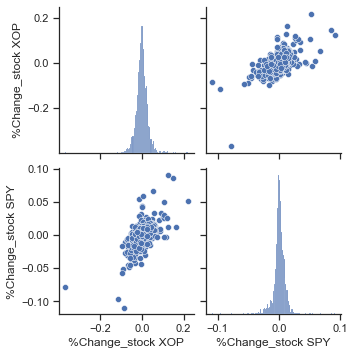

In [33]:
stock_for_plotting = stock_combined
stock_for_plotting1 = stock_for_plotting.drop(['Date'], axis=1)

import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(stock_for_plotting1)

corrMatrix = stock_for_plotting1.corr()
corrMatrix

#### Now we investigate the correlations between multiple stocks. 
The code below return the correlation matrix and scatter plot matrix of different stocks. We will use Microsoft, Google, Illumina, ExxonMobil, Goldman Sachs and Tesla as example.

In [34]:
interval = '1mo'
start_date = '2016-1-1'
end_date = date.today()

import os
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
from datetime import date

#Create an initial datasheet with SPY
tickerSymbol = 'SPY'
tickerData = yf.Ticker(tickerSymbol)
stock_master = tickerData.history(period=interval, start=start_date, end=end_date)
stock_close = index_convert_close(stock_master)
stock_close['%Change_stock ' + tickerSymbol]= stock_close['Close'].pct_change()
stock_close_SPY = stock_close.drop(['Close'], axis=1)
stock_final_table = stock_close_SPY.copy()
stock_final_table

,Date,%Change_stock SPY
0,2015-12-31,NaN
1,2016-01-04,-0.013980
2,2016-01-05,0.001691
3,2016-01-06,-0.012614
4,2016-01-07,-0.023991
...,...,...
1449,2021-10-04,-0.012896
1450,2021-10-05,0.010405
1451,2021-10-06,0.004156
1452,2021-10-07,0.008646


In [35]:
#Create an initial datasheet with SPY

stock_list = ['MSFT', 'GOOGL', 'ILMN', 'XOM', 'GS', 'TSLA']

tickerSymbol = 'SPY'
tickerData = yf.Ticker(tickerSymbol)
stock_master = tickerData.history(period=interval, start=start_date, end=end_date)
stock_close = index_convert_close(stock_master)
stock_close['%Change_stock ' + tickerSymbol]= stock_close['Close'].pct_change()
stock_close_SPY = stock_close.drop(['Close'], axis=1)
stock_final_table = stock_close_SPY.copy()
stock_final_table

#Combining other stocks
for stock_ticker in stock_list:
    tickerSymbol = stock_ticker
    tickerData = yf.Ticker(tickerSymbol)
    stock_master = tickerData.history(period=interval, start=start_date, end=end_date)
    
    stock_close = index_convert_close(stock_master)
    stock_close['%Change_stock ' + tickerSymbol]= stock_close['Close'].pct_change()
    stock_close = stock_close.drop(['Close'], axis=1)
    stock_close_1 = pd.merge(stock_final_table,stock_close,on='Date')
    #print(stock_close_1.head(5))
    stock_final_table = stock_close_1
    #print(stock_final_table.head(5))

stock_final_table.head(5)

,Date,%Change_stock SPY,%Change_stock MSFT,%Change_stock GOOGL,%Change_stock ILMN,%Change_stock XOM,%Change_stock GS,%Change_stock TSLA
0,2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-04,-0.013979,-0.012257,-0.023869,-0.055587,-0.006286,-0.017145,-0.069164
2,2016-01-05,0.001691,0.004562,0.002752,-0.017983,0.008521,-0.017218,0.000090
3,2016-01-06,-0.012614,-0.018165,-0.002889,-0.002584,-0.008321,-0.024413,-0.019648
4,2016-01-07,-0.023992,-0.034783,-0.024140,-0.055418,-0.016006,-0.030735,-0.015477


,%Change_stock SPY,%Change_stock MSFT,%Change_stock GOOGL,%Change_stock ILMN,%Change_stock XOM,%Change_stock GS,%Change_stock TSLA
%Change_stock SPY,1.000000,0.820769,0.760526,0.515389,0.645304,0.755578,0.424372
%Change_stock MSFT,0.820769,1.000000,0.772806,0.484887,0.371052,0.516294,0.409044
%Change_stock GOOGL,0.760526,0.772806,1.000000,0.454643,0.409638,0.503796,0.362687
%Change_stock ILMN,0.515389,0.484887,0.454643,1.000000,0.246787,0.327789,0.283865
%Change_stock XOM,0.645304,0.371052,0.409638,0.246787,1.000000,0.600129,0.202332
%Change_stock GS,0.755578,0.516294,0.503796,0.327789,0.600129,1.000000,0.291984
%Change_stock TSLA,0.424372,0.409044,0.362687,0.283865,0.202332,0.291984,1.000000


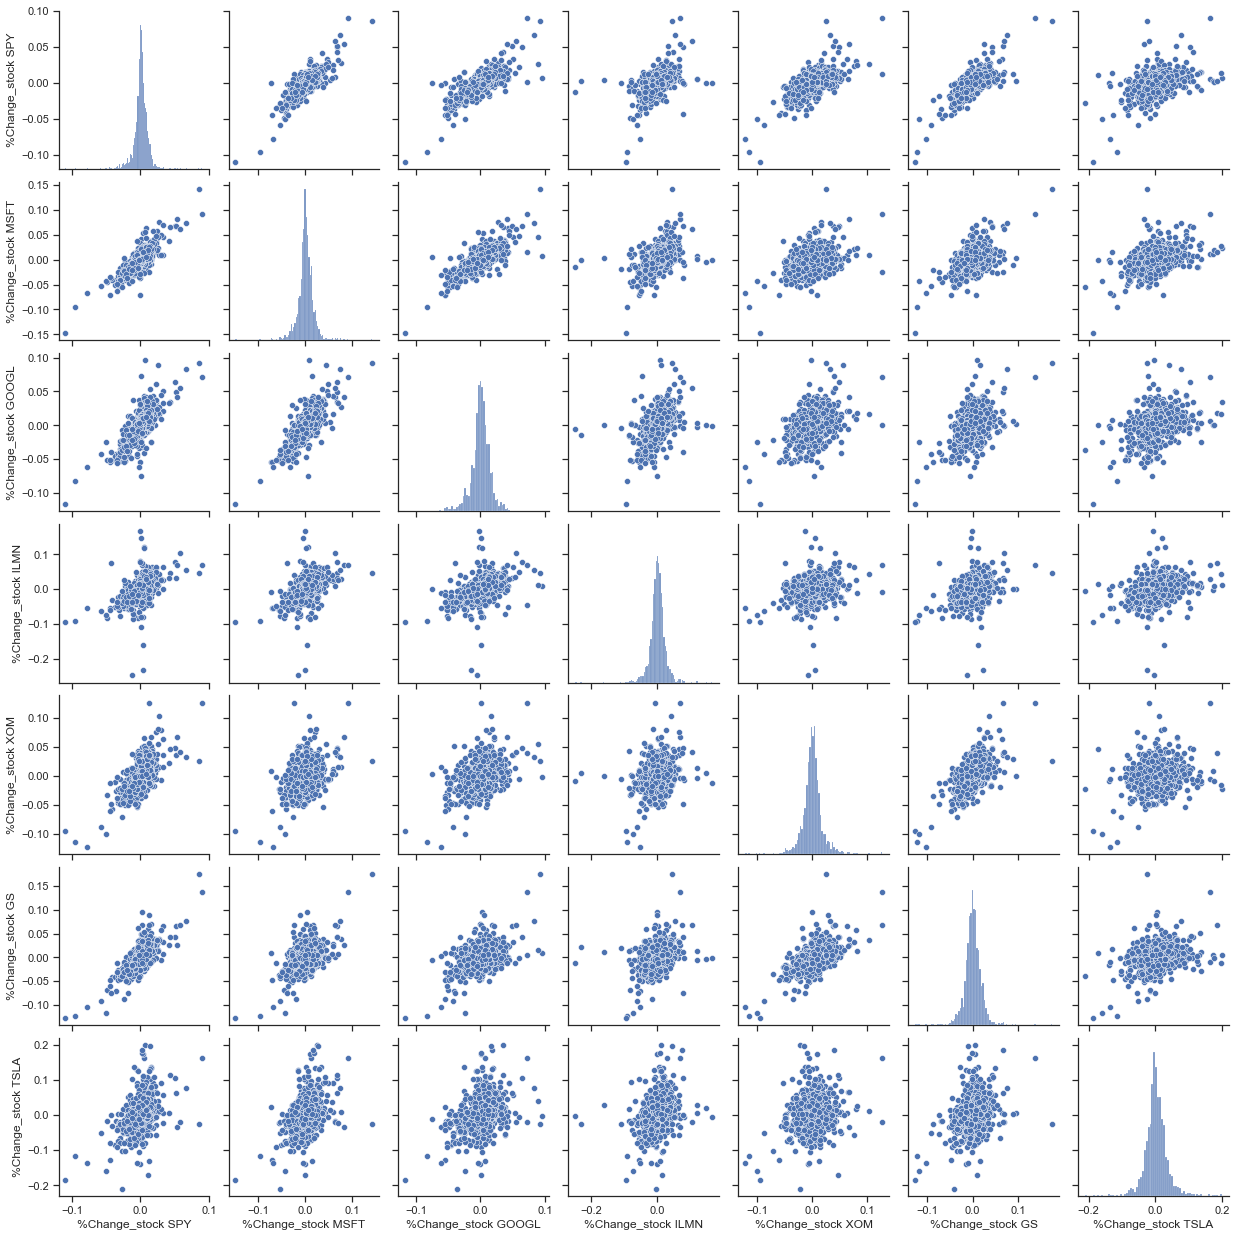

In [36]:
stock_for_plotting = stock_final_table
stock_for_plotting1 = stock_for_plotting.drop(['Date'], axis=1)

#Plotting scatter matrix
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(stock_for_plotting1)

#Generating correlation matrix
corrMatrix = stock_for_plotting1.corr()
corrMatrix

From the above analysis, all stocks are generally positively correlated with each other. This is normal as stocks tends to follow the overall market trend. 

The weakest correlations comes from Tesla and Exxonmobil, which have a correlation of approx 0.2.  Microsoft and S&P 500 has the strongest correlation, which is about 0.82 at this moment. 